In [1]:
# MIT License

# Copyright (c) 2024 GitHub

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

# Svarah: An Indic accented English speech dataset

India is the second largest English-speaking country in the world with a speaker base of roughly 130 million. Unfortunately, Indian speakers find a very poor representation in existing English ASR benchmarks such as LibriSpeech, Switchboard, Speech Accent Archive, etc. We address this gap by creating Svarah, a benchmark that contains 9.6 hours of transcribed English audio from 117 speakers across 65 districts across 19 states in India, resulting in a diverse range of accents. The collective set of native languages spoken by the speakers covers 19 of the 22 constitutionally recognized languages of India, belonging to 4 different language families.

Svarah includes both read speech and spontaneous conversational data, covering a variety of domains such as history, culture, tourism, government, sports, etc. It also contains data corresponding to popular use cases such as ordering groceries, making digital payments, and using government services (e.g., checking pension claims, checking passport status, etc.). The resulting diversity in vocabulary as well as use cases allows a more robust evaluation of ASR systems for real-world applications.

# Import Libraries

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torchaudio
from IPython.display import Audio

In [19]:
dir_path = "../data/svarah/"
df = pd.read_csv(dir_path+"meta_speaker_stats.csv")
df.sample(10)

,audio_filepath,duration,text,gender,age-group,primary_language,native_place_state,native_place_district,highest_qualification,job_category,occupation_domain
612,audio/281474976887081_f2283_chunk_4.wav,0.576375,Raaz,Female,30-45,Gujarati,Gujarat,Amreli,Post Graduate,Freelance,Education and Research
658,audio/281474976895453_f2650_chunk_0.wav,0.598562,Nine,Female,18-30,Malayalam,Kerala,Pathanamthitta,Post Graduate,Full Time,Education and Research
2954,audio/281474976887814_f3207_chunk_2.wav,3.700000,This is beyond the resources and capability of...,Female,45-60,Telugu,Telangana,Hyderabad,Post Graduate,Full Time,Education and Research
3394,audio/281474976885796_f2048_chunk_8.wav,4.319375,And then she puts it into such a realistic way,Female,30-45,Kannada,Karnataka,Gulbarga,Post Graduate,Full Time,Technology and Services
3693,audio/281474976887635_f2582_chunk_0.wav,4.775812,What was the price of 30 packets Charvik Chana...,Male,60+,Konkani,Goa,North Goa,Graduate,Full Time,Financial Services (Banking and Insurance)
2647,audio/281474976900340_f1967_chunk_2.wav,3.252375,is how to use a computer,Male,45-60,Kashmiri,Jammu Kashmir,Srinagar,Doctoral (PhD) or higher level,Full Time,Education and Research
2185,audio/281474976885796_f2048_chunk_2.wav,2.579625,He recalls his childhood days,Female,30-45,Kannada,Karnataka,Gulbarga,Post Graduate,Full Time,Technology and Services
116,audio/281474976903205_f1348_chunk_0.wav,0.328313,Jump,Female,45-60,Tamil,Tamil Nadu,Chennai,Post Graduate,Full Time,Technology and Services
6423,audio/281474976883906_f1874_chunk_3.wav,15.770000,"So they differ in syntax, in grammar, in tone....",Female,30-45,Marathi,Maharashtra,Pune,Post Graduate,Full Time,Education and Research
228,audio/281474976901775_f3083_chunk_0.wav,0.407187,Jump,Female,30-45,Assamese,Assam,Biswanath,Doctoral (PhD) or higher level,Full Time,Information and Media


In [4]:
# Describtive Statistics
svarah_sample = df.sample(1000)
svarah_sample.head()

,audio_filepath,duration,text,gender,age-group,primary_language,native_place_state,native_place_district,highest_qualification,job_category,occupation_domain
4110,audio/281474976883946_f1999_chunk_8.wav,5.398750,"Also, the people in Montessori school are of m...",Female,18-30,Malayalam,Kerala,Pathanamthitta,Post Graduate,Full Time,Technology and Services
5490,audio/281474976888864_f2163_chunk_1.wav,8.588375,like cooking one food and combining different ...,Female,18-30,Nepali,West Bengal,Darjeeling,Post Graduate,Other,Entertainment
5192,audio/281474976900620_f637_chunk_0.wav,7.761063,Are there any Free vaccination centres where B...,Male,30-45,Urdu,Gujarat,Ahmedabad,Graduate,Full Time,Technology and Services
3048,audio/281474976893909_f2140_chunk_9.wav,3.850125,into the side of a cliff with death-defying drops,Male,30-45,Bodo,Assam,Kokrajhar,Post Graduate,Other,Education and Research
2438,audio/281474976893637_f2312_chunk_2.wav,2.997937,the exact I mean the classical music,Male,30-45,Malayalam,Kerala,Palakkad,Post Graduate,Full Time,Technology and Services


In [5]:
# Descriptive statistics for the numerical column 'duration'
duration_stats = svarah_sample['duration'].describe()

# Summary statistics for categorical columns
categorical_summary = svarah_sample.describe(include=['object'])

display(duration_stats, categorical_summary)

count    1000.000000
mean        5.306603
std         4.676742
min         0.206625
25%         1.763078
50%         4.365125
75%         7.223141
max        29.195625
Name: duration, dtype: float64

,audio_filepath,text,gender,age-group,primary_language,native_place_state,native_place_district,highest_qualification,job_category,occupation_domain
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,894,2,4,19,17,65,6,4,11
top,audio/281474976883946_f1999_chunk_8.wav,Visual,Female,30-45,Nepali,West Bengal,Bangalore Urban,Post Graduate,Full Time,Education and Research
freq,1,9,560,404,89,121,61,652,609,487


In [6]:
# Function to create bar plots for categorical data
def plot_frequency_distribution(column_name, data, title):
    # Get the value counts from the data of a specific column
    freq_dist = data[column_name].value_counts()
    display(freq_dist)

    # Plot frequency distribution
    plt.figure(figsize=(7, 5))
    sns.countplot(x=column_name, data=data)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

gender
Female    560
Male      440
Name: count, dtype: int64

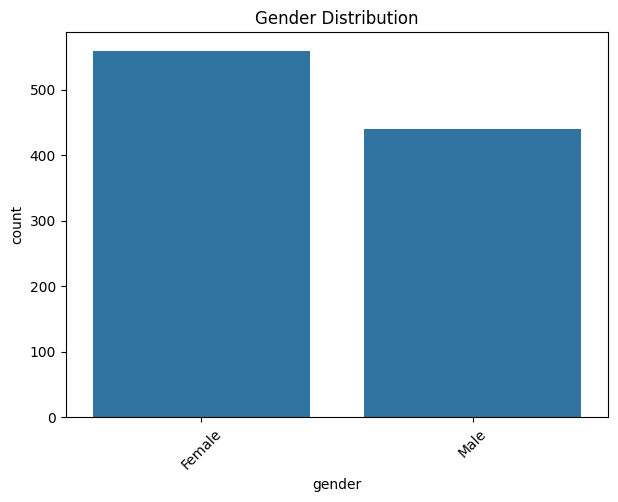

In [7]:
plot_frequency_distribution('gender', svarah_sample, 'Gender Distribution')


age-group
30-45    404
18-30    333
45-60    187
60+       76
Name: count, dtype: int64

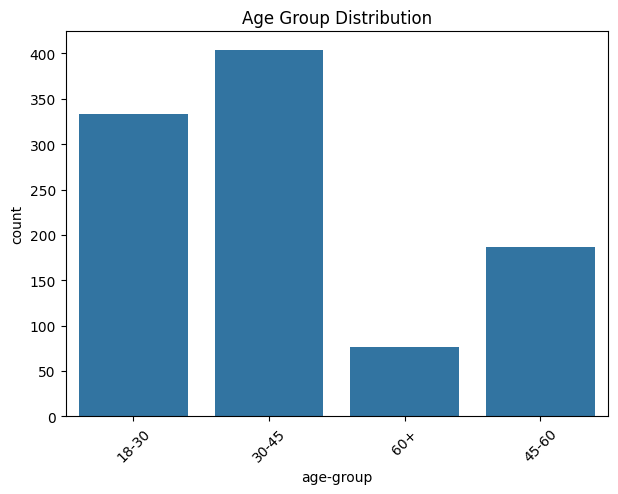

In [8]:
plot_frequency_distribution('age-group', svarah_sample, 'Age Group Distribution')

primary_language
Nepali       89
Kannada      87
Urdu         81
Malayalam    75
Maithili     66
Odia         61
Tamil        61
Bodo         59
Telugu       51
Bengali      47
Kashmiri     46
Hindi        45
Gujarati     43
Konkani      41
Marathi      39
Punjabi      33
Assamese     29
Dogri        24
Sindhi       23
Name: count, dtype: int64

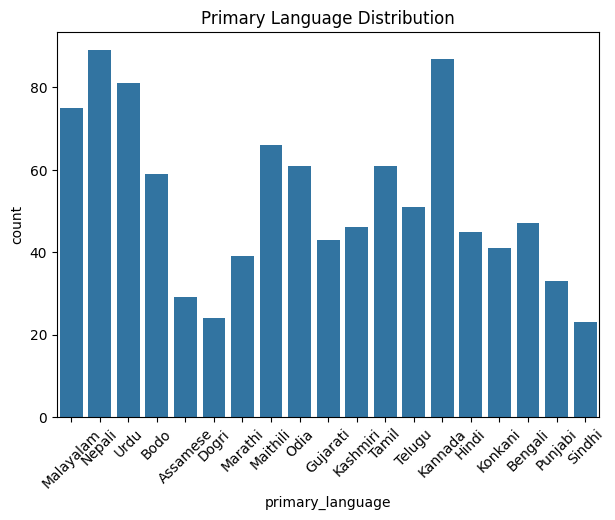

In [9]:
plot_frequency_distribution('primary_language', svarah_sample, 'Primary Language Distribution')

native_place_state
West Bengal       121
Karnataka         121
Assam              97
Gujarat            94
Kerala             90
Bihar              72
Jammu Kashmir      70
Maharashtra        69
Odisha             66
Goa                60
Punjab             33
Andhra Pradesh     32
Tamil Nadu         29
Telangana          18
Rajasthan          15
Meghalaya           8
Madhya Pradesh      5
Name: count, dtype: int64

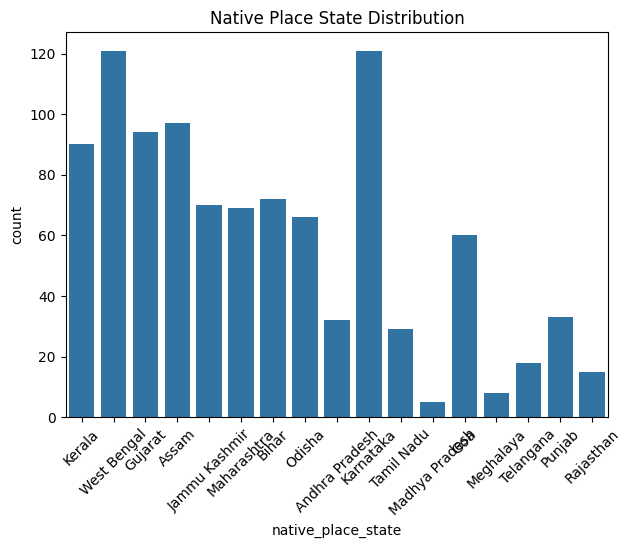

In [10]:
plot_frequency_distribution('native_place_state', svarah_sample, 'Native Place State Distribution')

highest_qualification
Post Graduate                              652
Graduate                                   196
Doctoral (PhD) or higher level             105
Under Graduate Student                      34
Senior Secondary Level at School (10+2)     10
Diploma Holder                               3
Name: count, dtype: int64

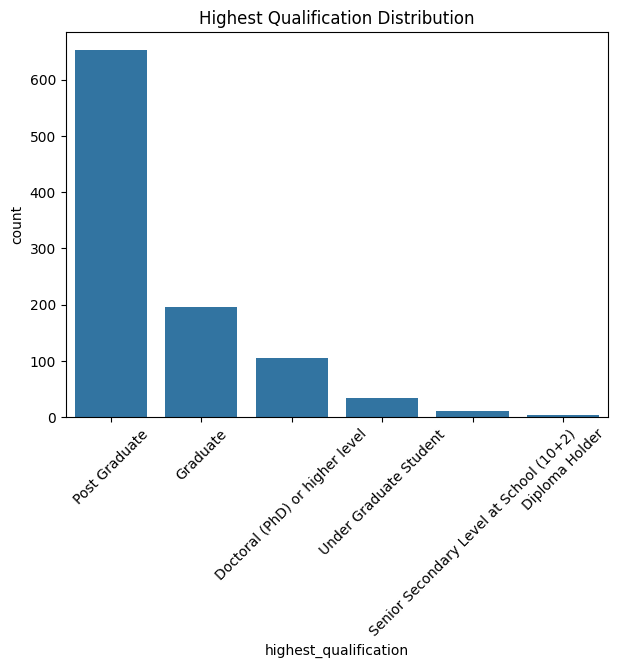

In [11]:
plot_frequency_distribution('highest_qualification', svarah_sample, 'Highest Qualification Distribution')

job_category
Full Time    609
Other        173
Part Time    144
Freelance     74
Name: count, dtype: int64

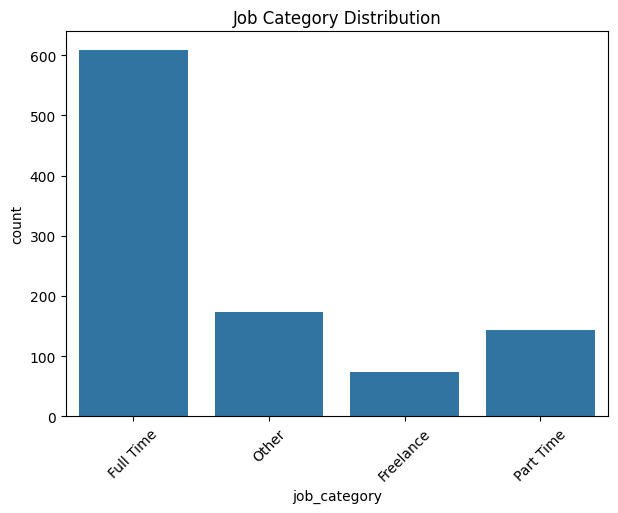

In [12]:
plot_frequency_distribution('job_category', svarah_sample, 'Job Category Distribution')

occupation_domain
Education and Research                        487
Technology and Services                       214
Information and Media                          77
Social service                                 47
Government                                     46
Financial Services (Banking and Insurance)     46
Entertainment                                  35
Healthcare (Medical &amp; Pharma)              24
Transportation and Logistics                   18
Manufacturing                                   5
Retail                                          1
Name: count, dtype: int64

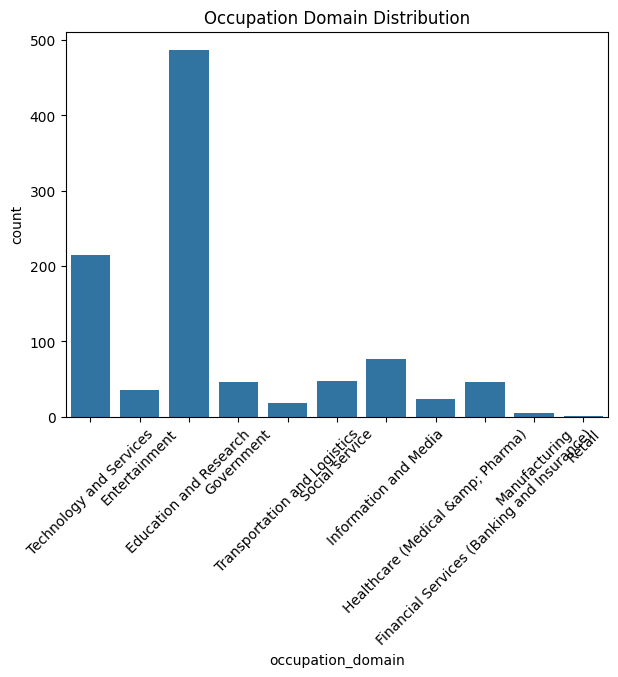

In [13]:
plot_frequency_distribution('occupation_domain', svarah_sample, 'Occupation Domain Distribution')

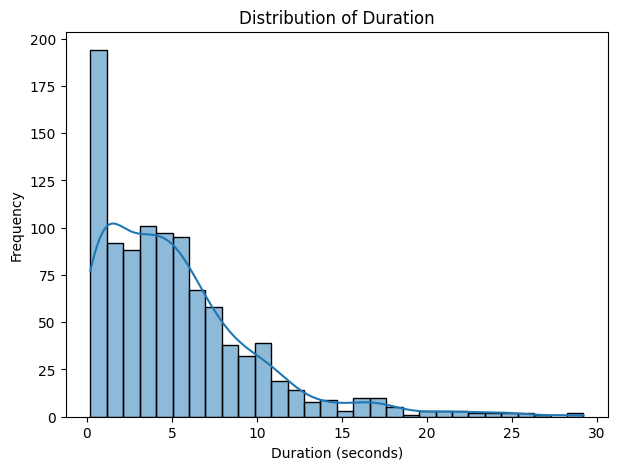

In [14]:
# See the distribution of our audio sample durations
plt.figure(figsize=(7, 5))
sns.histplot(svarah_sample['duration'], kde=True, bins=30)
plt.title('Distribution of Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

audio_filepath           0
duration                 0
text                     0
gender                   0
age-group                0
primary_language         0
native_place_state       0
native_place_district    0
highest_qualification    0
job_category             0
occupation_domain        0
dtype: int64

In [29]:
svarah_manifest = pd.read_json(dir_path+"svarah_manifest.json", lines=True)
svarah_manifest.sample(10) # len=6656

,audio_filepath,duration,text
5506,audio/281474976893763_f1558_chunk_0.wav,0.478500,Cat
732,audio/281474976883996_f2180_chunk_3.wav,10.023125,"Even from young age,like, students from standa..."
30,audio/281474976893787_f3214_chunk_1.wav,7.000000,"Education, Health, Care, Poverty, Reduction, W..."
2028,audio/281474976888630_f3289_chunk_9.wav,9.840000,I could not do that as my profession was in ch...
871,audio/281474976886979_f1251_chunk_0.wav,10.678500,For people of age group 18+ years is there any...
5603,audio/281474976925471_f3018_chunk_0.wav,0.459125,Off
1572,audio/281474976895161_f1356_chunk_0.wav,9.226437,Can you stop automatically sending Qadeer Rs. ...
229,audio/281474976899564_f2428_chunk_0.wav,0.263313,House
6390,audio/281474976896222_f3039_chunk_0.wav,0.455500,Help
4754,audio/281474976887016_f35_chunk_0.wav,4.901562,How many offers are there on items in Pet food...
